Élaborer par: Eya kalboussi

L'algorithme: Stochastic Gradient Descent

# La 1ér partie: Collecte et préparation des données



**1. Description de la base de données:**

***Objectif de cette partie** : Présentations des données d'entrées et la cible

> Le jeu de données comprend des informations sur les logements dans différentes régions de la Californie. Il est composé de 20 640 observations sur 8 variables. <br>
Notre base de donnée est California housing  [Dataset link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn-datasets-fetch-california-housing)  


> **Les données d'entrée** qui sont les plus important et utilisées par le modèle pour faire des prédictions comme suit:<br>


> ***MedInc** : revenu médian du bloc. Cette caractéristique représente le revenu médian des ménages dans un bloc donné (un bloc est l'unité géographique la plus petite pour laquelle le Bureau du recensement des États-Unis publie des données d'échantillon). Plus précisément, MedInc est la valeur médiane des revenus de tous les ménages dans un bloc.<br>
***HouseAge** : âge médian des maisons dans le bloc.<br>
***AveRooms** : nombre moyen de pièces par logement.<br>
***AveBedrms** : nombre moyen de chambres par logement.<br>
***Population** : population du bloc. <br>
***AveOccup** : occupation moyenne du ménage. <br>
***Latitude** : latitude du bloc. <br>
***Longitude** : longitude du bloc. <br>
***Output** : La variable cible est la valeur médiane de la maison en unités de 100 000 dollars américains. <br>
> **Notre output**  est la variable que nous cherchons à prédire(cible), à savoir la valeur médiane des maisons dans une région donnée (median house value). <br>



 **2. Import**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


**3. Charger les données**

In [ ]:
# importer the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target
california_housing = fetch_california_housing(as_frame=True)

#  Creation pandas DataFrame
df = pd.DataFrame(data.data,columns=data.feature_names)
df["MedHouseVal"] = data['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# La valeur max du MedHouseVal
df["MedHouseVal"].max()*100000


500000.99999999994

**4.Afficher des informations sur dataset**

In [ ]:
#Afficher des informations sur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


 **=>** On peut voir que :

* L'ensemble de données contient 20 640 échantillons et 9 caractéristiques
* Toutes les caractéristiques sont numériques et codées en nombres flottants.

**5.Vérification s'il existe des valeurs manquantes**

In [ ]:
# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())



MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# La 2éme partie: L'analyse des données :

***Objectif de cette partie** :
On cherche à savoir les caractéristiques qui sont les plus significatifs dans la prédiction les valeurs médianes des maisons (MedHouseVal).<br>



 **1.Diagramme de paires (a pair plot) des caractéristiques avant le nettoyage des données:**

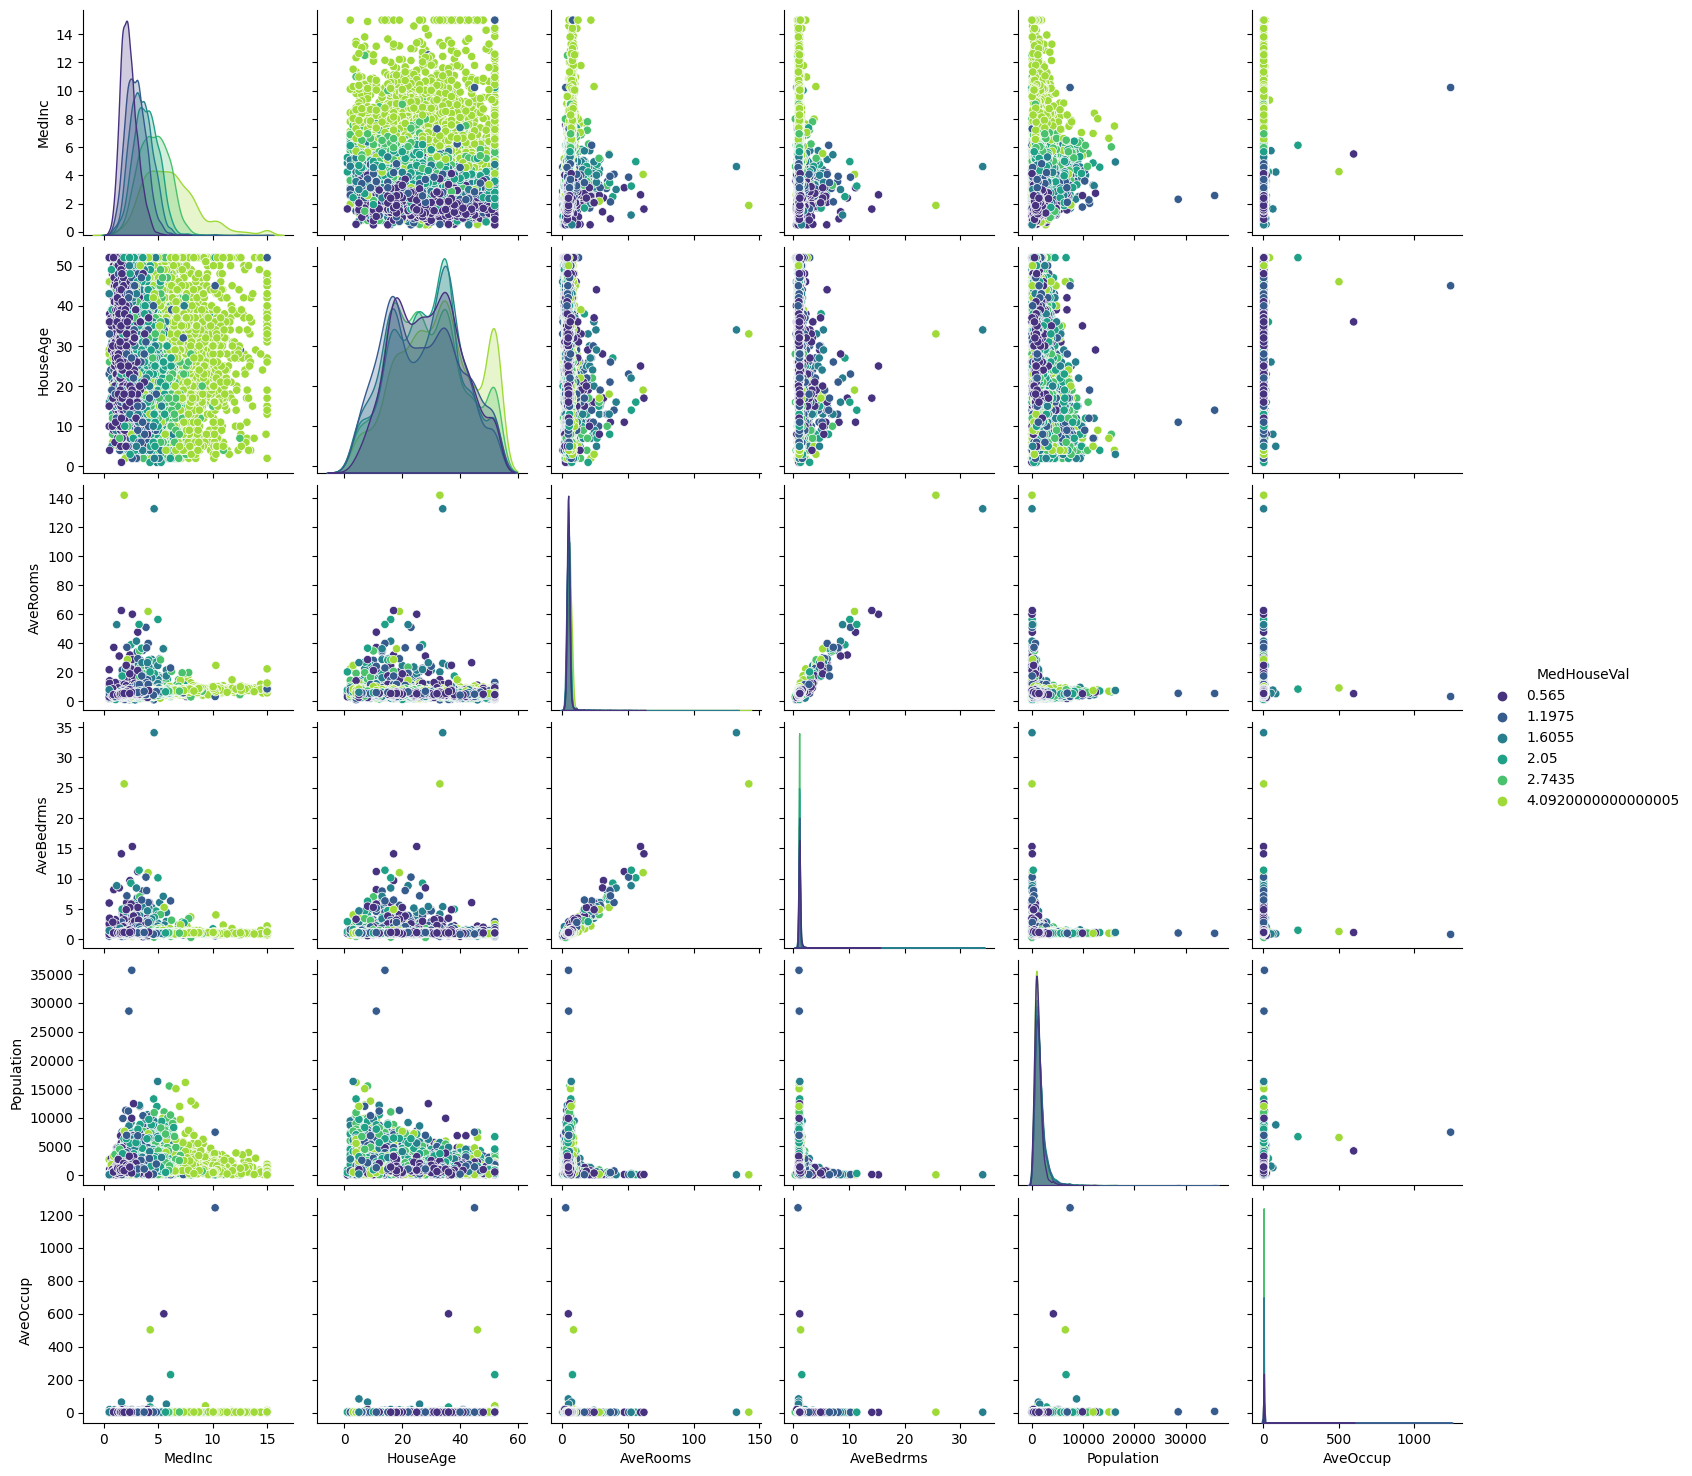

In [ ]:
# Supprimer les colonnes indésirables
columns_drop = ["Longitude", "Latitude"]
subset = df.drop(columns=columns_drop)

# Quantifier la cible et conserver le point médian pour chaque intervalle
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

# Tracer la matrice de diffusion (scatter matrix) avec des couleurs pour chaque intervalle de MédHouseVal
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")


**Conclusion :**  <br>
Nous pouvons confirmer que certaines caractéristiques ont des valeurs abberantes (outliers ?). Nous pouvons également voir que le revenu médian est utile pour distinguer les maisons de grande valeur des maisons de faible valeur. <br>
Ainsi, en créant un modèle prédictif, nous pourrions nous attendre à ce que la longitude, la latitude et le revenu médian soient des caractéristiques utiles pour aider à prédire les valeurs médianes des maisons. <br>



**1.La distribution des caractéristiques en traçant leurs histogrammes**.

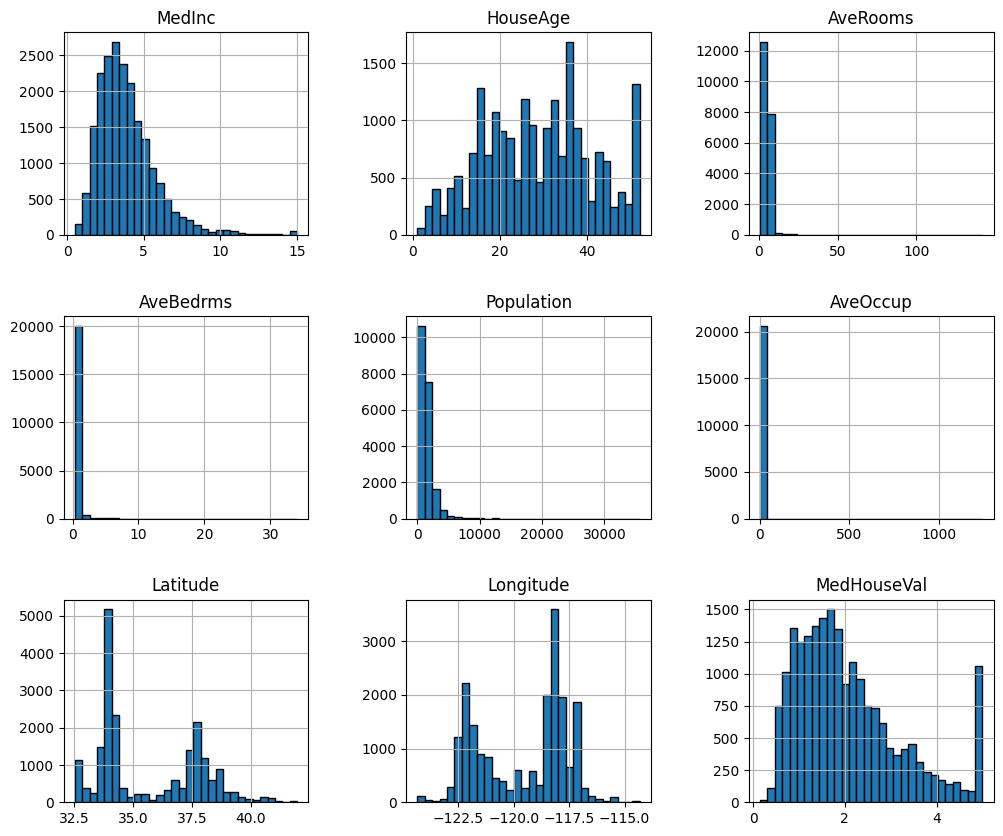

In [ ]:
# Create a histogram of the "frame" column in the california_housing_df dataframe
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.4, wspace=0.4)

**Interpretation:** <br>
Nous pouvons d'abord nous concentrer sur les caractéristiques pour lesquelles leurs distributions sont plus ou moins attendues.<br>

* **MedInc** est une distribution avec une longue queue. Cela signifie que le salaire des personnes est distribué plus ou moins normalement, mais que certaines personnes perçoivent un salaire élevé atteignant 2500.<br>
* **HouseAge**, la distribution est plus ou moins uniforme. <br>
* **medHouseVaL** la plupart des maisons les prix 2,5. Il y a plus 1000 maisons qui ont pour prix 5. <br>
* **MedHouseVal** a également une longue queue. En outre, nous avons un effet de seuil pour les maisons à valeur élevée : toutes les maisons dont le prix est supérieur à 5 se voient attribuer la valeur 5. <br>

* **AveBedrms, AveRooms , AveOccup et Population** l'éventail des données est large, avec une marge imperceptible pour les valeurs les plus élevées. <br>

**Conclusion** <br>
Cela signifie qu'il existe des valeurs très élevées et peu nombreuses peut-être pourraient-elles être considérées comme des valeurs aberrantes?

On va analyser de plus les colonnes AveBedrms, AveRooms , AveOccup et Population.




**2. Calculs des statistiques descriptives pour les caractéristiques "AveBedrms","AveRooms","AveOccup" et "Population"**

In [ ]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
df[features_of_interest].describe()



,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


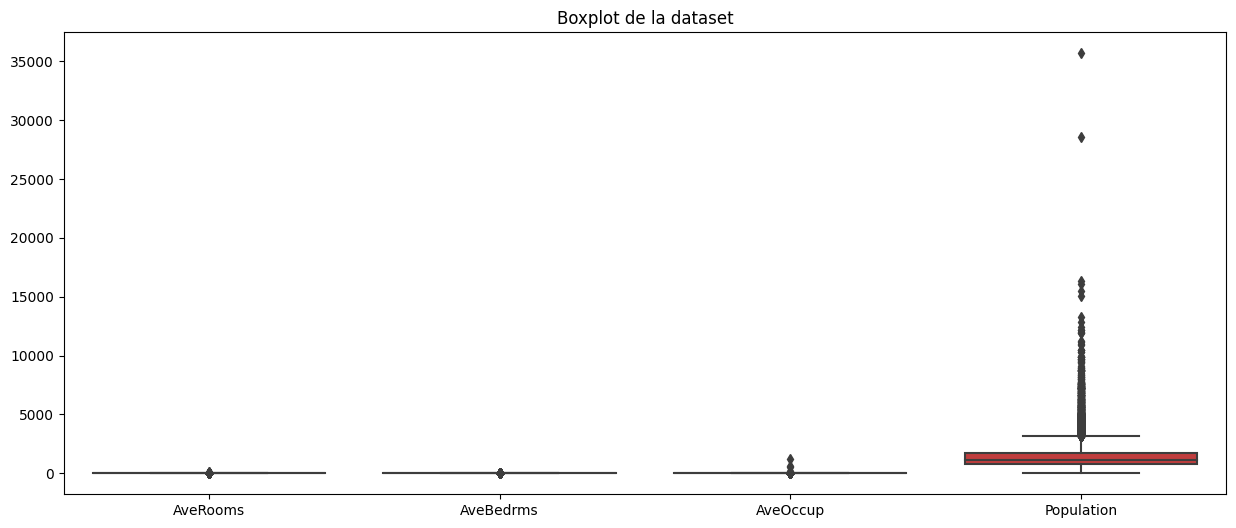

In [ ]:

# Affichage du boxplot des données nettoyées
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features_of_interest])
plt.title("Boxplot de la dataset")
plt.show()


**=>** Pour chacune de ces caractéristiques, si l'on compare les valeurs maximales et les valeurs de 75 % des données, on constate une énorme différence. Cela confirme que il y a des valeurs aberrantes dans les données. <br>
Ces valeurs extrêmes peuvent avoir un impact important sur les analyses statistiques et peuvent fausser les résultats.



# **3 éme partie :Nettoyage des données: <br>
**L'objectif de cette partie** est d'analyser et la détecter tous les valeurs aberrantes en se basant à chaque itération sur les statistiques descriptives pour les caractéristiques et La boite à moustache  qui une est l’une des rares méthodes de graphique statistique à afficher les valeurs aberrantes. Il utilise la méthode de l'IQR (Interquartile Range) pour définir les bornes supérieure et inférieure des valeurs aberrantes.

**1.Détecter et supprimer les valeurs aberrantes**

Nombre de valeurs aberrantes identifiées : 220
            MedInc     HouseAge     AveRooms    AveBedrms   Population  \
count  1603.000000  1603.000000  1603.000000  1603.000000  1603.000000   
mean      3.685579    31.566438     5.181020     1.047830  1156.429195   
std       1.433676    12.059716     0.983162     0.064059    40.362161   
min       0.768300     2.000000     2.383333     0.882812  1086.000000   
25%       2.585250    22.000000     4.510691     1.004938  1123.500000   
50%       3.563700    33.000000     5.109344     1.046512  1156.000000   
75%       4.597400    40.000000     5.831618     1.087841  1190.000000   
max       7.723400    52.000000     8.056689     1.223077  1227.000000   

          AveOccup     Latitude    Longitude  MedHouseVal  
count  1603.000000  1603.000000  1603.000000  1603.000000  
mean      2.837889    35.650636  -119.621784     2.025256  
std       0.580696     2.142829     2.019621     1.089708  
min       1.316043    32.540000  -124.270000  

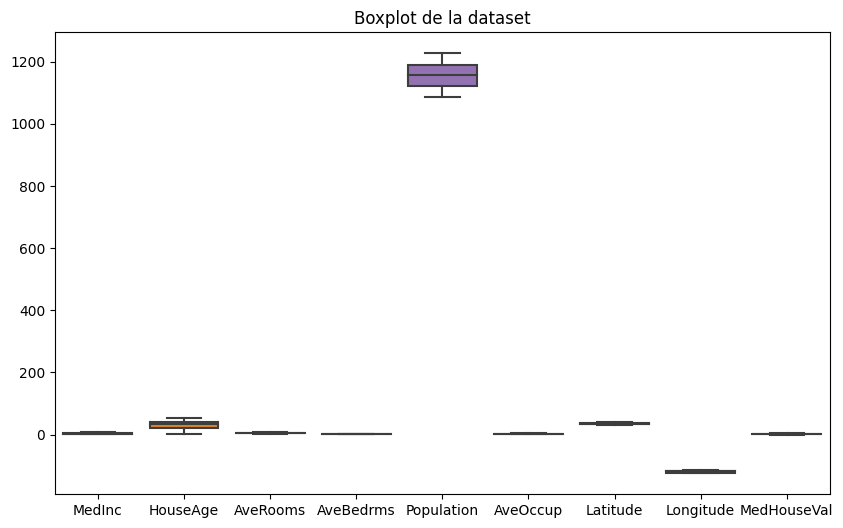

In [ ]:
# Fonction pour détecter et supprimer les valeurs aberrantes
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)].count()
    df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_clean, outliers

# Première vérification des valeurs aberrantes
df_clean, outliers = remove_outliers(df)
print("Nombre de valeurs aberrantes identifiées :", outliers.sum())
print(df_clean.describe())

# Tant qu'il y a des valeurs aberrantes, répéter le processus
while outliers.sum() > 0:
    df_clean, outliers = remove_outliers(df_clean)
    print("Nombre de valeurs aberrantes identifiées :", outliers.sum())
    print(df_clean.describe())

# Affichage du boxplot des données nettoyées
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)
plt.title("Boxplot de la dataset")
plt.show()

In [ ]:
df_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
...,...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56,1.168
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


* On voit aussi que la taille de dateset initial est 20640 rows × 8 columns aprés la supression des valeurs aberrantes devient 14963 rows × 9 columns.

**Conclusion :** <br>
*À chaque itération on  a essayé de minimiser  le nombre  des valeurs aberrantes jusqu'à plus les avoir.<br>
* Le Calcul des statistiques descriptives montre que pour chacune de ces caractéristiques, si l'on compare les valeurs maximales et les valeurs de 75 % des données.On constate plus une énorme différence comme précédament  sauf la colonne population. <br>
Cela confirme que il n y a plus des valeurs aberrantes dans les données sauf la colonne population (75%= 1580.000000 et max = 2738.000000 )<br>

* Les résultat du boxplot peut signifier qu'il n'y a plus de valeurs aberrantes dans les colonnes sélectionnées après la suppression sauf dans la colonne population.<br>

* On voit aussi que la taille de dateset initial est 20640 rows × 8 columns aprés la supression des valeurs aberrantes devient 14963 rows × 9 columns.
**=====>** Donc il y a encore  des valeurs aberrantes dans notre dataset dans la la colonne population.

**2.Supprimer tous des valeurs aberrantes de  la colonne 'Population'**

Toutes les valeurs aberrantes ont été supprimées de la colonne 'population'.
count    1779.000000
mean     1156.139966
std        40.536962
min      1086.000000
25%      1122.500000
50%      1156.000000
75%      1190.000000
max      1227.000000
Name: Population, dtype: float64


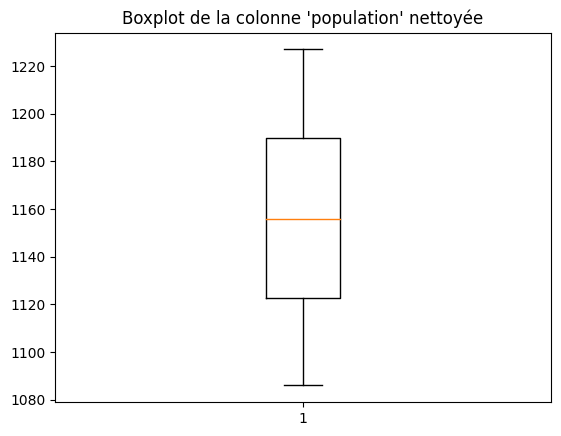

In [ ]:
# Calculer les quantiles pour la colonne 'population'
q1 = df['Population'].quantile(0.01)
q99 = df['Population'].quantile(0.99)

# Supprimer les valeurs aberrantes jusqu'à ce qu'il n'y en ait plus
while True:
    # Identifier les valeurs aberrantes
    outliers = (df['Population'] < q1) | (df['Population'] > q99)
    num_outliers = outliers.sum()

    # Sortir de la boucle si aucune valeur aberrante n'est trouvée
    if num_outliers == 0:
        break

    # Supprimer les valeurs aberrantes
    df = df[~outliers]

    # Recalculer les quantiles pour la nouvelle colonne 'population'
    q1 = df['Population'].quantile(0.01)
    q99 = df['Population'].quantile(0.99)

# Vérifier que toutes les valeurs aberrantes ont été supprimées
if (df['Population'] < q1).any() or (df['Population'] > q99).any():
    print("Il reste des valeurs aberrantes dans la colonne 'population'.")
else:
    print("Toutes les valeurs aberrantes ont été supprimées de la colonne 'population'.")

# Afficher les statistiques descriptives
print(df['Population'].describe())
# Tracer un graphique boxplot
plt.boxplot(df['Population'])
plt.title("Boxplot de la colonne 'population' nettoyée")
plt.show()




**Conclusion:** <br>
En basant sur l'analyse du Calculs des statistiques descriptives et le boxplot en comparant le "75%= 1567.000000 et max =2716.000000 ". on trouve pas une grande difference comme au début . <br>
**=====>** Cela signifie que on a pas des valeurs aberrantes dans notre dataset.

#4 éme partie : Visualiser les relations entre les caractéristiques. <br>
**1.La matrice de corrélation:**

> Le graphe de corrélation permet de visualiser les relations linéaires entre les différentes variables dans le dataset. Cela peut être utile pour plusieurs raisons, notamment pour sélectionner les variables les plus importantes pour la modélisation ou pour comprendre comment les différentes caractéristiques sont liées entre elles.

* si deux variables ont une forte corrélation positive (représentée par une couleur plus foncée sur le graphe), cela peut indiquer qu'elles sont liées de manière linéaire et que la variation de l'une peut être utilisée pour prédire la variation de l'autre.
* D'un autre côté, si deux variables ont une forte corrélation négative (représentée par une couleur plus claire sur le graphe), cela peut indiquer qu'elles ont une relation inverse et qu'une augmentation de l'une peut être associée à une diminution de l'autre.





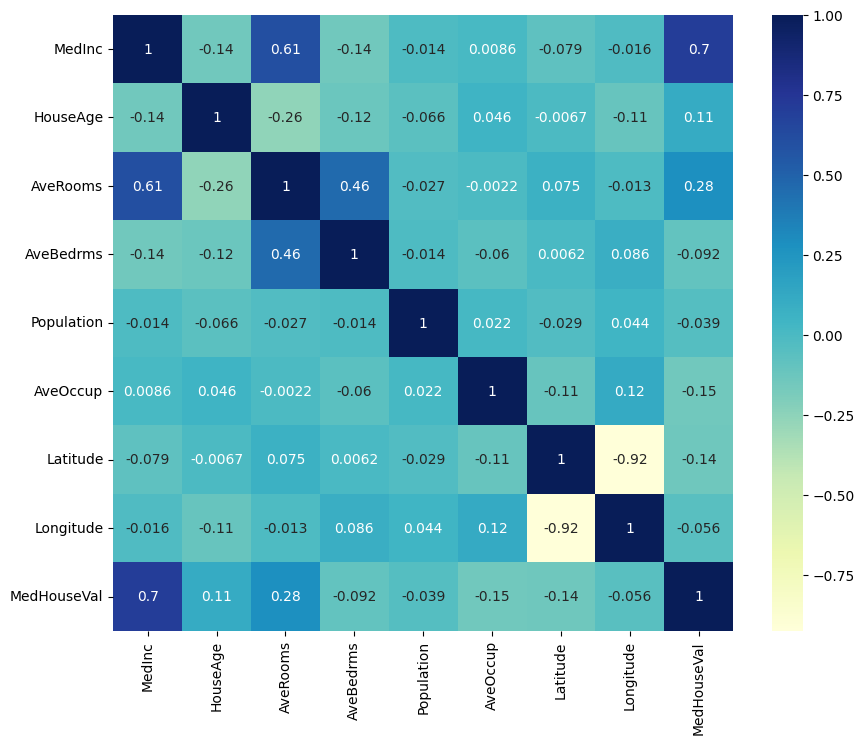

In [ ]:
# Calculer la matrice de corrélation entre les variables
corr_matrix = df.corr()

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.show()


 **Critére de interpretation:**

* Les valeurs de la diagonale (en haut à gauche jusqu'en bas à droite) correspondent à la corrélation de chaque variable avec elle-même. Elles sont donc toutes égales à 1.

* Les autres valeurs correspondent aux corrélations entre deux variables différentes. cela indique une forte corrélation positive entre la deuxième variable et la première variable. Si la valeur est proche de -1, cela indique une forte corrélation négative.

* Plus la couleur de la case est foncée, plus la corrélation est forte. Les couleurs claires indiquent une faible corrélation.

**===> Conclusion:** On voit ici que il y'a une forte corrélation entre les deux variables "AveRoom" (nombre moyen de pièces par logement)et aussi "AveBedrms" (nombre moyen de chambres par logement) à 80%.<br>
Donc il y a une relation entre ses deux variables  une relation les deux variables augmentent ensemble



# 5 éme partie: Préparation de jeux de donnees pour le rendre plus  homogène, équitable et représentatif :

Aprés la suppression des valeurs aberrantes il est important d'effectuer:

**Normalisation des données** : La normalisation des données est effectuée à l'aide de la classe StandardScaler de Scikit-learn. Elle permet de mettre les données à la même échelle pour faciliter l'entraînement des modèles.
Dans le cas de l'entraînement d'un modèle SGDRegressor, la standardisation est importante car les variables d'entrée peuvent avoir des échelles très différentes. Par exemple, la variable "latitude" du jeu de données California Housing est mesurée en degrés, tandis que la variable "médiane du revenu des ménages" est mesurée en dollars. La standardisation permettra donc de mettre ces variables à la même échelle




In [ ]:
# Normalisation
scaler = preprocessing.MinMaxScaler()
#scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_clean.iloc[:, :-1])



# 6 éme partie :Diviser les données en ensemble d'entraînement et ensemble de test :


In [ ]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(df_scaler, df_clean["MedHouseVal"], test_size=0.3, random_state=42)

In [ ]:
# affichage les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test

(array([[0.11929585, 0.66666667, 0.51108657, ..., 0.62021072, 0.44314559,
         0.46728016],
        [0.79802213, 0.29411765, 0.71349666, ..., 0.76805671, 0.1424017 ,
         0.65235174],
        [0.73198672, 0.23529412, 0.89634148, ..., 0.4669935 , 0.65143464,
         0.34458078],
        ...,
        [0.2713194 , 0.62745098, 0.36288484, ..., 0.97130014, 0.15196599,
         0.63394683],
        [0.33010455, 0.52941176, 0.60945393, ..., 0.33258206, 0.61955367,
         0.35582822],
        [0.45444659, 0.25490196, 0.64803305, ..., 0.3740423 , 0.7151966 ,
         0.3599182 ]]),
 array([[0.46539449, 0.90196078, 0.45334512, ..., 0.32303599, 0.50690755,
         0.25153374],
        [0.3589461 , 0.80392157, 0.23510832, ..., 0.85229105, 0.15409139,
         0.62985685],
        [0.42979569, 0.39215686, 0.35016545, ..., 0.43517611, 0.17640808,
         0.58997955],
        ...,
        [0.14884793, 0.47058824, 0.58736129, ..., 0.96655558, 0.44314559,
         0.46421268],
        [0.5

==> Nous fixons 30 % pour le test et 70 % pour l'entraînement.
==> En fixant le paramètre "random_state" à une valeur fixe, par exemple random_state=42, pour assurer la même division aléatoire est générée à chaque fois que nous exécutons le code.

# 7 éme partie :Entrainement du modéle

**1.Problème de régression**
Le problème de la prévision des prix des logements en Californie consiste à prévoir une valeur continue (c'est-à-dire le prix d'un logement) sur la base d'un ensemble de caractéristiques d'entrée telles que le nombre de chambres, l'emplacement, l'âge du logement, etc. Ce type de problème, dont l'objectif est de prédire une sortie continue, est connu sous le nom de problème de régression.<br>

**2.choix de l'algorithme** <br>
> **La descente de gradient stochastique**  <br>
(SGD) est un algorithme d'optimisation couramment utilisé dans l'apprentissage automatique pour former des modèles. Il s'agit d'une variante de la descente de gradient qui met à jour les paramètres du modèle sur un petit sous-ensemble des données d'apprentissage à la fois, plutôt que sur l'ensemble des données.


In [ ]:
# Initialize a SGDRegressor model with default hyperparameters
sgd = SGDRegressor(random_state=42)

# Train the model on the standardized training data
sgd.fit(X_train, y_train)

# Predict the values on the test set
y_pred = sgd.predict(X_test)

# Calculate the quality metrics of the prediction
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("MSE: ", mse)
print("R2 score: ", r2)


NameError: ignored

 **Interpretation des résulats du modéle avant l'ajustement des hyperparamètres**

*Le MSE est une mesure de l'erreur quadratique moyenne des prédictions du modèle, et une valeur plus faible indique une meilleure performance du modèle. Dans notre cas, le MSE de 0.3165052432312251 est faible

*Le R² mesure la proportion de variance de la variable de réponse qui est expliquée par le modèle, et une valeur plus élevée indique une meilleure performance du modèle. Dans ce cas, le R² de 0.5801704054477321 suggère que le modèle explique environ 58% de la variance des données de test, ce qui peut être considéré comme acceptable.

**Résumé** <br>
les résultats de ce modèle sont encourageants, mais il est possible d'améliorer encore la performance du modèle en ajustant les hyperparamètres du modèle de régression SGD.


# 7éme partie : Variation des hyperparamètres:
> **Objectif** :Faire varier les hyperparamètres, on peut utiliser la méthode "GridSearchCV" de la bibliothèque "sklearn". <br>
 Pour comprendre l'influence de chaque hyperparamètre sur les performances du modèle, il est courant de faire varier chacun d'entre eux séparément et d'observer l'impact sur les différentes métriques de qualité du modèle.

Les hyperparamètres de la classe SGDRegressor dans la bibliothèque scikit-learn sont les paramètres qui doivent être définis avant l'entraînement du modèle SGD. Voici une brève explication de chacun de ces hyperparamètres :<br>


> ***Alpha** : Il s'agit du paramètre de régularisation qui contrôle la magnitude de la pénalité ajoutée aux coefficients du modèle pour éviter le surapprentissage. Une valeur plus élevée de alpha correspond à une pénalité plus forte.<br>
***Penalty** : Ce paramètre spécifie la fonction de régularisation utilisée. Les options disponibles sont "l2" pour la régularisation L2, "l1" pour la régularisation L1, "elasticnet" pour une combinaison des deux. <br>
***max_iter** : Il s'agit du nombre maximum d'itérations de la descente de gradient stochastique. Si le modèle ne converge pas avant le nombre d'itérations maximal, une erreur sera levée. <br>
***learning_rate** : Ce paramètre spécifie la méthode de mise à jour des poids lors de la descente de gradient. Les options disponibles sont "constant" pour une vitesse d'apprentissage constante, "optimal" pour une vitesse d'apprentissage optimale, "invscaling" pour une vitesse d'apprentissage inversement proportionnelle au nombre d'itérations, "adaptive" pour une vitesse d'apprentissage adaptative en fonction de la perte. <br>
***la vitesse d'apprentissage initiale (eta0)** : Il s'agit de la vitesse d'apprentissage initiale. Il est utilisé avec la méthode de mise à jour "constant" pour contrôler la vitesse d'apprentissage. <br>
***tol** : Ce paramètre spécifie la tolérance de convergence de la descente de gradient. Si la perte ne diminue pas de plus de tol pendant max_iter itérations consécutives, l'entraînement s'arrête. <br>





>**1. Variation de la vitesse d'apprentissage initiale (eta0) et nombre maximum d'itérations de la descente de gradient stochastique et Influence sur les différentes métriques de qualité:**

In [ ]:
# Hyperparamètres à tester
etas = [0.001, 0.01, 0.1, 1]
max_iters = [100, 1000, 10000]

# Entraîner et évaluer le modèle pour chaque combinaison d'hyperparamètres
for eta in etas:
    for max_iter in max_iters:
        # Initialiser le modèle
        sgd = SGDRegressor(random_state=42, eta0=eta, max_iter=max_iter)

        # Entraîner le modèle sur les données d'entraînement
        sgd.fit(X_train, y_train)

        # Prédire les valeurs sur l'ensemble de test
        y_pred = sgd.predict(X_test)

        # Calculer les métriques de qualité de la prédiction
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Afficher les résultats pour chaque combinaison d'hyperparamètres
        print("Eta:", eta, "Max iter:", max_iter, "MSE:", mse, "R2 score:", r2)


Eta: 0.001 Max iter: 100 MSE: 0.42326702180284004 R2 score: 0.4385558345363263
Eta: 0.001 Max iter: 1000 MSE: 0.42326702180284004 R2 score: 0.4385558345363263
Eta: 0.001 Max iter: 10000 MSE: 0.42326702180284004 R2 score: 0.4385558345363263
Eta: 0.01 Max iter: 100 MSE: 0.3165052432312251 R2 score: 0.5801704054477321
Eta: 0.01 Max iter: 1000 MSE: 0.3165052432312251 R2 score: 0.5801704054477321
Eta: 0.01 Max iter: 10000 MSE: 0.3165052432312251 R2 score: 0.5801704054477321
Eta: 0.1 Max iter: 100 MSE: 0.2923794781404577 R2 score: 0.6121721191410516
Eta: 0.1 Max iter: 1000 MSE: 0.2923794781404577 R2 score: 0.6121721191410516
Eta: 0.1 Max iter: 10000 MSE: 0.2923794781404577 R2 score: 0.6121721191410516
Eta: 1 Max iter: 100 MSE: 0.29193651874237087 R2 score: 0.6127596843346117
Eta: 1 Max iter: 1000 MSE: 0.29193651874237087 R2 score: 0.6127596843346117
Eta: 1 Max iter: 10000 MSE: 0.29193651874237087 R2 score: 0.6127596843346117


**Conclusion**: <br>
On voit la bonne combinaison du MSE: 0.29193651874237087 et R2 score: 0.6127596843346117 pour les valeurs Eta: 1  et Max iter: 10000.

>**2. La variation du penalty en gardant la vitesse d'apprentissage initiale (eta0) =1  et nombre maximum d'itérations =10000et et test d'influence  sur les différentes métriques de qualité:**

In [ ]:
# Définir les hyperparamètres à tester
penalty = ['l1', 'l2', 'elasticnet']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df_scaler, df_clean['MedHouseVal'], test_size=0.3, random_state=42)

# Boucler sur les différents hyperparamètres et calculer les métriques de qualité
for p in penalty:
    sgd = SGDRegressor(penalty=p, eta0=1, max_iter=1000, random_state=42)
    sgd.fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Penalty: {p} MSE: {mse} R2 score: {r2}")



Penalty: l1 MSE: 0.29215345683108174 R2 score: 0.6124719259742868
Penalty: l2 MSE: 0.29193651874237087 R2 score: 0.6127596843346117
Penalty: elasticnet MSE: 0.2919601747102754 R2 score: 0.6127283057851991


**Conclusion:**
* Le résultat montre que pour un hyperparamètre "penalty" égal à "l2", l'algorithme de descente de gradient stochastique a produit un modèle avec une erreur quadratique moyenne (MSE) de 0.2919 et un score R2 de 0.6127. Cela indique que le modèle peut expliquer 61,27% de la variance dans les données de test. <BR>
* L'utilisation de la pénalité L2 peut aider à améliorer la qualité du modèle en réduisant l'overfitting et en généralisant mieux sur les données de test. <BR>

**2**. **La variation d'alpha en gardant la vitesse d'apprentissage initiale (eta0) =1 et nombre maximum d'itérations =10000et et penalty= L2 test d'influence sur les différentes métriques de qualité:**

In [ ]:
# Initialisation des hyperparamètres
penalty = "l2"
eta0 = 1
max_iter = 1000

# Valeurs d'alpha à tester
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# Boucle de test pour chaque valeur d'alpha
for alpha in alphas:
    # Initialisation du modèle
    sgd = SGDRegressor(penalty=penalty, eta0=eta0, alpha=alpha, max_iter=max_iter, random_state=42)

    # Entraînement du modèle sur les données d'entraînement standardisées
    sgd.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = sgd.predict(X_test)

    # Calcul des métriques de qualité de la prédiction
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Affichage des résultats
    print("Alpha: ", alpha)
    print("MSE: ", mse)
    print("R2 score: ", r2)


Alpha:  0.0001
MSE:  0.29193651874237087
R2 score:  0.6127596843346117
Alpha:  0.001
MSE:  0.2954809834808423
R2 score:  0.6080581154794944
Alpha:  0.01
MSE:  0.37637210980761626
R2 score:  0.5007597705233707
Alpha:  0.1
MSE:  0.6016098976965167
R2 score:  0.20199224237166724
Alpha:  1
MSE:  0.7647179292347764
R2 score:  -0.014363032030214606


**Conclusion**: <br>

* Dans le cas de l'influence de l'hyperparamètre alpha sur les performances du modèle avec penalty=l2, eta0=1 et max_iter=1000, on a obtenu un MSE de 0.29193651874237087 et un R2 score de 0.6127596843346117 pour la valeur de alpha de 0.0001.

* L'hyperparamètre alpha est utilisé pour régulariser le modèle et réduire le surajustement (overfitting). Une valeur élevée de alpha va conduire à un modèle plus régularisé, tandis qu'une valeur faible va permettre au modèle de mieux s'adapter aux données d'entraînement.

* Dans notre cas, la valeur de alpha est très faible (0.0001), ce qui signifie que le modèle est peu régularisé. Cela peut expliquer pourquoi nous avons obtenu des résultats relativement bons, avec un MSE de 0.29193651874237087 et un R2 score de 0.6127596843346117.

**3**. **La variation du learning_rate en gardant la vitesse d'apprentissage initiale (eta0) =1 et nombre maximum d'itérations =10000et et penalty= L2 et alpha = 0.0001 et leur Influence sur les différentes métriques de qualité:**

In [ ]:
# définition des hyperparamètres à tester
alpha = 0.0001
penalty = 'l2'
eta0 = 1
max_iter = 1000
learning_rates = ['invscaling', 'adaptive', 'constant', 'optimal']

# boucle pour tester les différentes valeurs de learning_rate
for lr in learning_rates:
    # initialisation du modèle avec les hyperparamètres choisis
    model = SGDRegressor(alpha=alpha, penalty=penalty, eta0=eta0, max_iter=max_iter, learning_rate=lr)
    # entraînement du modèle
    model.fit(X_train, y_train)
    # prédiction sur l'ensemble de test
    y_pred = model.predict(X_test)
    # calcul des métriques de qualité
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # affichage des résultats pour chaque learning_rate testé
    print(f"Learning rate: {lr} MSE: {mse} R2 score: {r2}")




Learning rate: invscaling MSE: 0.28621977328127995 R2 score: 0.6203426832909195
Learning rate: adaptive MSE: 0.28493064832919585 R2 score: 0.6220526480309516
Learning rate: constant MSE: 5.510962025352829e+23 R2 score: -7.310036728227466e+23
Learning rate: optimal MSE: 0.28950684509932195 R2 score: 0.6159825342629156


**Conclusion:**

* Pour "invscaling", la MSE est de 0,32 et le R2 score est de 0,58, ce qui indique une performance moyenne.<br>
* Pour "adaptive", la MSE est de 0,28 et le R2 score est de 0,62, ce qui indique une performance élevée. <br>
*Pour "constant", la MSE est extrêmement élevée, ce qui indique une très mauvaise performance. Cela est probablement dû au fait que la valeur du learning rate reste constante tout au long de l'entraînement, ce qui peut entraîner une divergence du modèle. <br>
*Pour "optimal", la MSE est de 0,29 et le R2 score est de 0,58, ce qui indique une performance élevée similaire à celle de "adaptive".

**4. La variation de la Tolérance en gardant la vitesse d'apprentissage initiale (eta0) =1 , nombre maximum d'itérations =10000 ,penalty= L2 et alpha = 0.0001 et learning_rate = adaptive et  leur Influence sur les différentes métriques de qualité:**


In [ ]:
# définition des hyperparamètres Fixe
alpha = 0.0001
penalty = 'l2'
learning_rate = 'adaptive'
eta0 = 1
max_iter = 1000
tolerance = [0.0001, 0.001, 0.01, 0.1, 1]

# boucle sur les valeurs de tolérance
for tol in tolerance:
    # définition du modèle
    model = SGDRegressor(alpha=alpha, penalty=penalty, learning_rate=learning_rate, eta0=eta0, max_iter=max_iter, tol=tol)
    # entraînement du modèle
    model.fit(X_train, y_train)
    # prédiction sur le jeu de test
    y_pred = model.predict(X_test)
    # calcul des métriques de qualité
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # affichage des résultats
    print(f"Tolerance: {tol} MSE: {mse} R2 score: {r2}")


Tolerance: 0.0001 MSE: 0.2849158751113003 R2 score: 0.622072244022525
Tolerance: 0.001 MSE: 0.2849343615322384 R2 score: 0.6220477226385255
Tolerance: 0.01 MSE: 0.2849550713632189 R2 score: 0.6220202520037421
Tolerance: 0.1 MSE: 0.284849164673805 R2 score: 0.6221607323383587
Tolerance: 1 MSE: 0.2848966922495399 R2 score: 0.6220976892031262


**Conclusion:** <br>
*On peut observer que la valeur optimale pour la tolérance de convergence semble être autour de 0.01, car c'est celle qui donne la MSE = 0.28482809166763395 le plus faible et le R2 = 0.6221886847082673 le plus élevé. <br>
Cela signifie que pour cette valeur de tolérance, le modèle a la meilleure capacité de prédiction pour les données de test.

# 8 éme partie: L'analyse des résultats d'un modèle:

* L'augmentation de la valeur d'Eta peut améliorer les performances du modèle, mais une augmentation excessive peut entraîner une instabilité. De même, l'augmentation de la valeur de Max_iter peut également améliorer les performances, mais cela peut augmenter considérablement le temps de calcul. En ce qui concerne le choix de la pénalité, nous avons vu que l'utilisation de la norme L2 peut améliorer les performances.

* Enfin, en ce qui concerne les ajustements du taux d'apprentissage et de la tolérance de convergence, nous avons vu que l'utilisation d'un taux d'apprentissage adaptatif peut améliorer les performances, et que des valeurs de tolérance plus petites peuvent également améliorer les performances.

* En conclusion, il est important de considérer soigneusement les ajustements des hyperparamètres pour obtenir les meilleures performances possibles du modèle SGD.


# 9 éme partie: Conclusion
* Après avoir effectué plusieurs ajustements des hyperparamètres du modèle SGD, on peut conclure que le modéle donne une bonne performance avec cette combinaision des hyperparamètres:
>
*Alpha = 0.0001 <br>
*learning_rate = adaptive <br>
*la vitesse d'apprentissage initiale (eta0) =1 <br>
*nombre maximum d'itérations =10000 <br>
*penalty= L2 <br>
*Tolerance: 0.01  <br>


* Au début  la valeur MSE:  0.3165052432312251 et la valeur R2 score:  0.5801704054477321. <br>
*Aprés l'ajustement du modéle, Les valeurs sont devenues  MSE: 0.2849442532090163 et  R2 score: 0.6220346017859016. <br>

====> Cela signifie qu'on a pu améliorerles performances du modèle.